# Info

- ORCHID
- imported from south archipelago
- if sunlight exxposure is less than 7 hours per day production decreases with 4% for every ten minutes
- ideal humidity is between 60% and 80%; production falls for 2% for every 5% point for humidity change

- storage: 0.1 seashell per orchid per timestep

# Tasks:
- calculate avg trade volume and order book volume -> doesnt seem to be liquid enough to market make
- look at executed trades for amethyst and starfruit, also create more features and use MSE to evaluate regressions


# Idea
- arbitrage between two markets
- if we can make profit buy selling and buying on the two markets send orders on current market and then cover it in secondary in next step
- ideally predict price movement in next step and calculate profitability from that not from current price
- could also include a longer time horizon with regression
- do order matching for all orders that are still profitable

- check for big change in pnl in IMC sim (why, maybe correlated with one of the variables)?

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [110]:

prices_path__1 = r'D:/Projects/IMC_Challenge/Round_2/data/prices_round_2_day_-1.csv'
prices_path_1 = r'D:/Projects/IMC_Challenge/Round_2/data/prices_round_2_day_1.csv'
prices_path_0 = r'D:/Projects/IMC_Challenge/Round_2/data/prices_round_2_day_0.csv'
df__1 = pd.read_csv(prices_path__1, sep=";")
df_0 = pd.read_csv(prices_path_0, sep=";")
df_1 = pd.read_csv(prices_path_1, sep=";")

merged = pd.concat([df__1,df_0,df_1], axis=0)
merged = merged.fillna(0) 
merged = merged.drop(['DAY','timestamp'], axis=1)
merged.index = np.arange(1,30004)

df_1['ORCHIDS_rolling50'] = df_1['ORCHIDS'].rolling(50).mean()
df_1['ORCHIDS_rolling50'] = df_1['ORCHIDS'].rolling(50).mean()


print(merged.shape)
print(merged.keys())
print(merged.describe())
print(merged.corr())

(30003, 6)
Index(['ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF',
       'SUNLIGHT', 'HUMIDITY'],
      dtype='object')
            ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
count  30003.000000    30003.000000   30003.000000   30003.000000   
mean    1103.617855        1.237043       9.728044      -3.405143   
std       81.975222        0.287521       1.368582       1.235526   
min      960.750000        0.700000       7.500000      -6.500000   
25%     1039.250000        1.000000       8.500000      -4.500000   
50%     1081.750000        1.300000       9.500000      -2.600000   
75%     1195.750000        1.400000      10.500000      -2.400000   
max     1257.250000        2.100000      19.500000      -2.000000   

           SUNLIGHT      HUMIDITY  
count  30003.000000  30003.000000  
mean    2777.073279     79.073562  
std      912.366591      9.366057  
min     1397.304900     59.999580  
25%     1973.018900     71.204712  
50%     2498.066200     78.

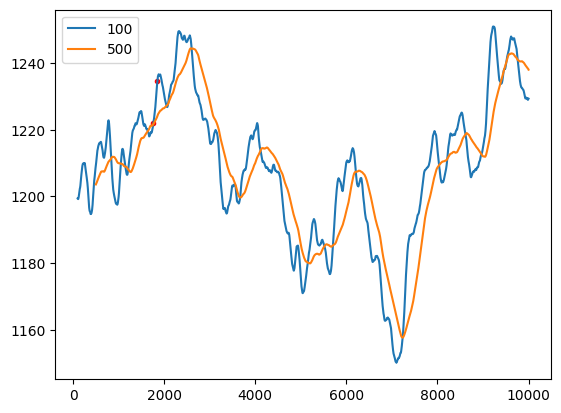

In [120]:
from math import isclose

# 10*100-100*0.1*90=1000

#assert isclose(a, b, abs_tol=1e-8)

#plt.plot(df__1['ORCHIDS'].rolling(20).mean()[:5000],label='20')
#plt.plot(df__1['ORCHIDS'].rolling(30).mean()[:5000],label='30')
# plt.plot(df__1['ORCHIDS'].rolling(40).mean()[:500])
# plt.plot(df__1['ORCHIDS'].rolling(50).mean()[:500])
df__1['rolling100'] = df__1['ORCHIDS'].rolling(100).mean()
plt.plot(df__1['ORCHIDS'].rolling(100).mean(),label='100')
#plt.plot(df__1['ORCHIDS'],label='price', color='green')
# plt.plot(df__1['ORCHIDS'].rolling(200).mean()[:5000],label='200')
# plt.plot(df__1['ORCHIDS'].rolling(300).mean()[:5000],label='300')
df__1['rolling500'] = df__1['ORCHIDS'].rolling(500).mean()
equals = df__1[df__1['rolling100']== df__1['rolling500']]
plt.plot(df__1['ORCHIDS'].rolling(500).mean(),label='500')
plt.scatter(1760,df__1['rolling100'][1760],marker='.', color = 'red')
plt.scatter(1850,df__1['rolling100'][1850],marker='.', color = 'red')
#plt.scatter(equals['rolling100'], equals['rolling500'],marker='o',color = 'red')
#plt.plot(df__1['ORCHIDS'].rolling(1000).mean()[:5000],label='1000')
plt.legend()

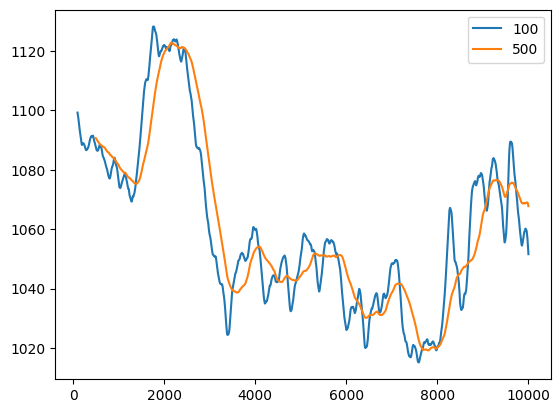

In [112]:
from math import isclose

#assert isclose(a, b, abs_tol=1e-8)

#plt.plot(df__1['ORCHIDS'].rolling(20).mean()[:5000],label='20')
#plt.plot(df__1['ORCHIDS'].rolling(30).mean()[:5000],label='30')
# plt.plot(df__1['ORCHIDS'].rolling(40).mean()[:500])
# plt.plot(df__1['ORCHIDS'].rolling(50).mean()[:500])
df_1['rolling100'] = df_1['ORCHIDS'].rolling(100).mean()
plt.plot(df_1['ORCHIDS'].rolling(100).mean(),label='100')
# plt.plot(df__1['ORCHIDS'].rolling(200).mean()[:5000],label='200')
# plt.plot(df__1['ORCHIDS'].rolling(300).mean()[:5000],label='300')
df_1['rolling500'] = df_1['ORCHIDS'].rolling(500).mean()
equals = df_1[df_1['rolling100']== df_1['rolling500']]
plt.plot(df_1['ORCHIDS'].rolling(500).mean(),label='500')
#plt.scatter(equals['rolling100'], equals['rolling500'],marker='o',color = 'red')
#plt.plot(df__1['ORCHIDS'].rolling(1000).mean()[:5000],label='1000')
plt.legend()

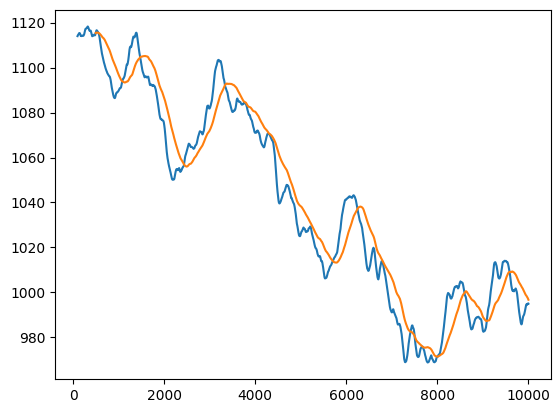

In [113]:
from math import isclose

#assert isclose(a, b, abs_tol=1e-8)


# plt.plot(df__1['ORCHIDS'].rolling(40).mean()[:500])
# plt.plot(df__1['ORCHIDS'].rolling(50).mean()[:500])
df_0['rolling100'] = df_0['ORCHIDS'].rolling(100).mean()
plt.plot(df_0['ORCHIDS'].rolling(100).mean(),label='100')
# plt.plot(df__1['ORCHIDS'].rolling(200).mean()[:5000],label='200')
# plt.plot(df__1['ORCHIDS'].rolling(300).mean()[:5000],label='300')
df_0['rolling500'] = df_0['ORCHIDS'].rolling(500).mean()
equals = df_0[df_0['rolling100']== df_0['rolling500']]
plt.plot(df_0['ORCHIDS'].rolling(500).mean(),label='500')
#plt.scatter(equals['rolling100'], equals['rolling500'],marker='o',color = 'red')
#plt.plot(df__1['ORCHIDS'].rolling(1000).mean()[:5000],label='1000')

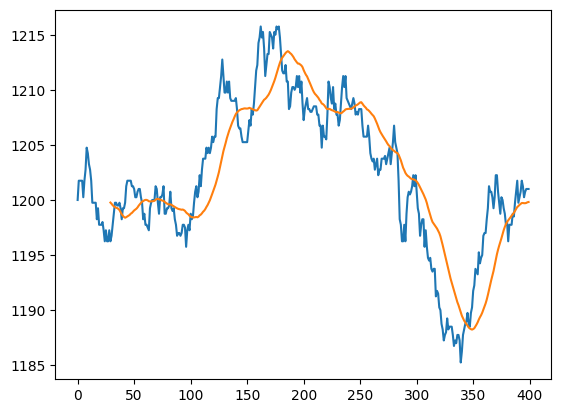

In [126]:
plt.plot(df__1['ORCHIDS'][:400])
plt.plot(df__1['ORCHIDS'].rolling(30).mean()[:400],label='30')

In [93]:
equals.size

0

Text(0.5, 1.0, 'import_tariff')

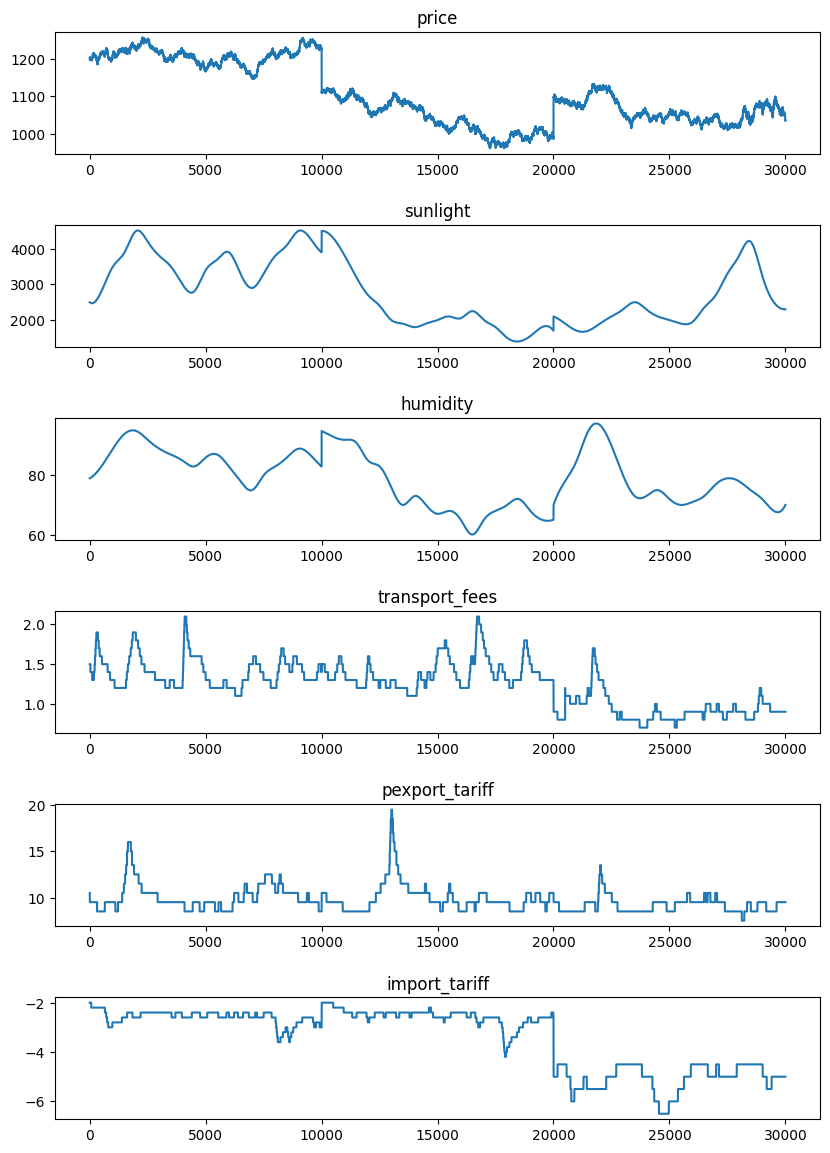

In [58]:
fig, ax = plt.subplots(6,figsize=(9, 12))
fig.tight_layout(pad=3.0)
ax[0].plot(merged['ORCHIDS'])
ax[0].set_title('price')
ax[1].plot(merged['SUNLIGHT'])
ax[1].set_title('sunlight')
ax[2].plot(merged['HUMIDITY'])
ax[2].set_title('humidity')
ax[3].plot(merged['TRANSPORT_FEES'])
ax[3].set_title('transport_fees')
ax[4].plot(merged['EXPORT_TARIFF'])
ax[4].set_title('pexport_tariff')
ax[5].plot(merged['IMPORT_TARIFF'])
ax[5].set_title('import_tariff')

In [127]:
X = []
Y = []
trend = np.array(merged['ORCHIDS'].to_list())
timestep = 4

for i in range(len(trend)-timestep-1):

    X.append(trend[i:i+timestep]) 
    Y.append(trend[i+timestep])

X = np.array(X)
print(len(X))
Y = np.array(Y)

29998


In [128]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(Y[:20000], X[:20000,:])
res = model.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.811e+07
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:20:08   Log-Likelihood:                -36643.
No. Observations:               20000   AIC:                         7.330e+04
Df Residuals:                   19995   BIC:                         7.334e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1661      0.133      1.252      0.2

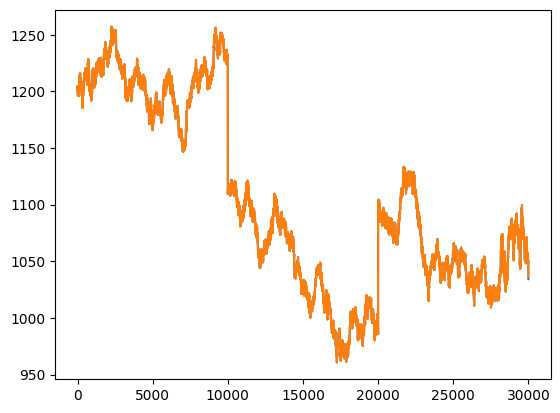

In [129]:
Y_pred = res.predict(X)
plt.plot(Y)
plt.plot(Y_pred)

In [ ]:
import json
from datamodel import Listing, Observation, Order, OrderDepth, ProsperityEncoder, Symbol, Trade, TradingState
from typing import Any
import pandas as pd
class Trader:
	def run(self, state):
		result = {}
		trader_data  = ''
		conversions = 0
		time = state.timestamp
		if time == 0:
			od = state.order_depths['ORCHIDS']
			buy_orders = list(od.buy_orders.items())
			buy_orders.sort(key = lambda x:x[0], reverse = True)
			sell_orders = list(od.sell_orders.items())
			sell_orders.sort(key = lambda x: x[0])
			best_bid = buy_orders[0][0]
			best_ask = sell_orders[0][0]
			result['ORCHIDS'] = [Order('ORCHIDS',best_bid,-2)]
			print(state.observations.conversionObservations['ORCHIDS'].bidPrice)
			print(state.observations.conversionObservations['ORCHIDS'].askPrice)
			print(state.observations.conversionObservations['ORCHIDS'].importTariff)
			print(state.observations.conversionObservations['ORCHIDS'].exportTariff)
			print(state.observations.conversionObservations['ORCHIDS'].transportFees)
		if time == 100:
			conversions = 2
			print(state.observations.conversionObservations['ORCHIDS'].bidPrice)
			print(state.observations.conversionObservations['ORCHIDS'].askPrice)
			print(state.observations.conversionObservations['ORCHIDS'].importTariff)
			print(state.observations.conversionObservations['ORCHIDS'].exportTariff)
			print(state.observations.conversionObservations['ORCHIDS'].transportFees)
		return result, conversions, trader_data
		# pnl = qty*( local best_bid at ts 0) - qty*(conversion best_ask at ts = 100) - qty*(import tariff) - qty*(transport fees)
		# pnl = 2*1094 - 2*1099 - 2*(-5) - 2*(0.9) = -1.8 calculation explanation

# STARFRUIT

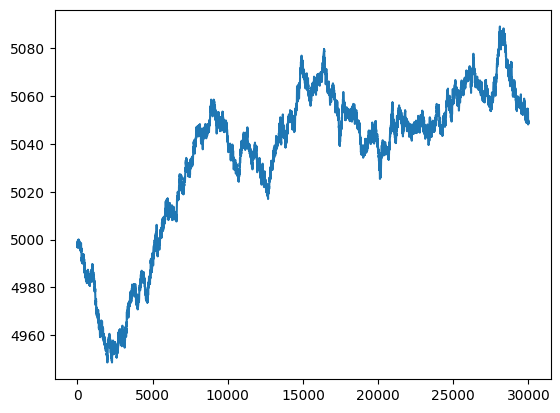

In [156]:
plt.plot(df_star['bid_price_1'].rolling(5).mean())

29995


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.729e+06
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:47:43   Log-Likelihood:                -40433.
No. Observations:               20000   AIC:                         8.088e+04
Df Residuals:                   19995   BIC:                         8.092e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2342      1.909      1.694      0.0

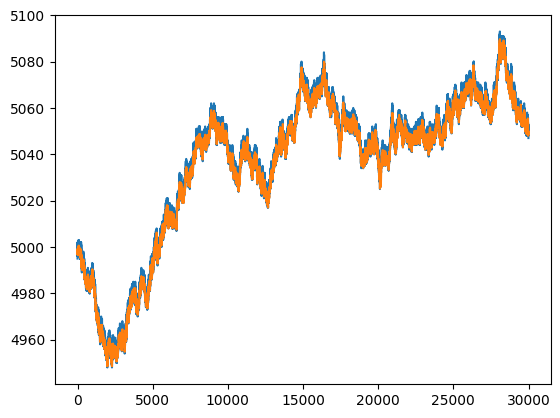

In [157]:
X = []
Y = []
trend = np.array(df_star['ask_price_1'].to_list())
timestep = 4

for i in range(len(trend)-timestep-1):

    X.append(trend[i:i+timestep]) 
    Y.append(trend[i+timestep])

X = np.array(X)
print(len(X))
Y = np.array(Y)

29995


In [158]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(Y[:20000], X[:20000,:])
res = model.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.917e+06
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:49:44   Log-Likelihood:                -39434.
No. Observations:               20000   AIC:                         7.888e+04
Df Residuals:                   19995   BIC:                         7.892e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9417      1.815      1.621      0.1

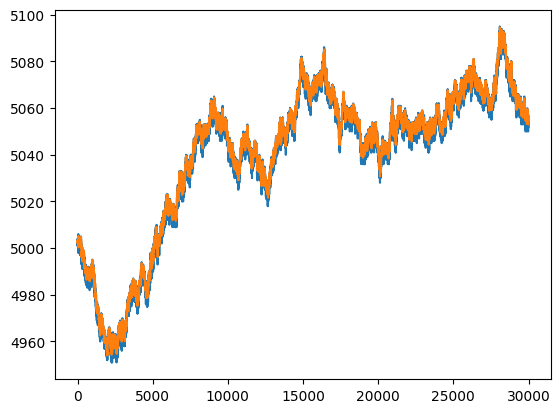

In [159]:
Y_pred = res.predict(X)
plt.plot(Y)
plt.plot(Y_pred)